# Introducción a Python aplicado a las Ciencias Sociales

### Talleres Introductorios Q-Lab 2024-II
### Encargadas: Lucía Díaz y Brisa Cruz

## Objetivos de esta sesión 🐼

1.   (Nuevo) Replicar los aprendizajes de la sesión anterior en una nueva base de datos. ☝
2.   Utilizar bibliotecas de Python para crear gráficos. 📊
3.   Interpretar gráficos para análisis social. 🔎


**Nueva dinámica: 💡 Punto extra 💡**

## [Recordatorio] Evaluación

***Asistencia***

- Es necesario asistir al 75% de las sesiones.

**Tarea**

- Dejaremos 1 tarea al finalizar las 5 sesiones, que será realizada en grupo. Será elegir una base de datos y hacer un análisis descriptivo de 5 variables (estadísticos básicos con descripción breve y gráficos). Se tendrá plazo hasta el miércoles 21 (11:59pm).
  - No es necesario esperar hasta la última sesión para empezar la tarea, tods las sesiones aprenderan algo útil para el proyecto.
  - Se realizará en grupo de 3-5 personas. Pueden apuntarse aquí: https://docs.google.com/spreadsheets/d/1zwuFgFiNCTY5yzwr-3mW09dh15K2aoUtePKQNsY9oTw/edit?usp=sharing


**Por favor no se apunten ahora y miren la clase.**

# **Sección 1: (Repaso) Unir bases de datos (*dataframes*)** e interpretar estadísticos

### "*Jugar al fútbol es muy sencillo, pero jugar un fútbol sencillo es la cosa más difícil que hay*"
-Johan Cruyff ⭐


Podríamos extender esta lógica al código. Por eso nos pareció importante compartir con ustedes esta segunda versión con un **código más simple y efectivo**.

## 1. Importando los datos

Empezamos importando las dos bases de datos (Enaho01a-2023-500 and Enaho01A-2023-300) desde sus respectivos archivos CSV. Una tiene información sobre temas educativos del encuestado y otra sobre temas de empleo.

- En este caso, estamos uniendo dos secciones o módulos diferentes de una misma fuente (la ENAHO).

- Sin embargo, el proceso es el mismo para unir bases de diferentes fuentes. Por ejemplo, Censo + ENAHO o ENAHO + datos RENIEC o ENAHO + datos MEF. Por lo general, esto se hace a partir de la columna del **ubigeo**.

Tenemos **dos rutas** para esto: **la primera es con la librería "os"**

In [1]:
# paso 1
import os # como vimos la clase pasada
from google.colab import drive # importamos la función para conectar colab con Google Drive

In [2]:
# paso 2
drive.mount("/content/drive", force_remount=True) # conectamos colab con nuestro Drive

Mounted at /content/drive


In [4]:
# paso 3
os.chdir("/content/drive/MyDrive/datos_python") # configuramos directorio, según el nombre de nuestra carpeta

**La segunda ruta es cuando trabajamos desde Jupyter, con la librería Path**

In [ ]:
from pathlib import Path

In [ ]:
downloads_path = str(Path.home() / "Downloads") # configuramos directorio, según el nombre de nuestra carpeta

Ahora vamos a importar los archivos, exactamente igual que la clase anterior.

In [5]:
import pandas as pd # librería necesaria para importar dfs

# Importar conjuntos de datos
enaho_educa = pd.read_csv('Enaho01A-2023-300.csv', encoding='ISO-8859-10') # módulo educación
enaho_trabajo = pd.read_csv('Enaho01a-2023-500.csv', encoding='ISO-8859-10') # módulo trabajo

<ipython-input-5-b4292895aa2e>:4: DtypeWarning: Columns (26,32,60) have mixed types. Specify dtype option on import or set low_memory=False.
  enaho_educa = pd.read_csv('Enaho01A-2023-300.csv', encoding='ISO-8859-10') # módulo educación
<ipython-input-5-b4292895aa2e>:5: DtypeWarning: Columns (218,223,228,231,234,235,236,241,246,251,256,261,266,271,276,281,286,291,296,301,306,311,316,321,326,331,338,341,344,347,350,353,356,359,363,365,367,369,371,373,375,377,379,381,385,386,387,388,389,393,485,486,487,488,935,936,937,938,939,940,941,942,943,944,1015,1018,1023) have mixed types. Specify dtype option on import or set low_memory=False.
  enaho_trabajo = pd.read_csv('Enaho01a-2023-500.csv', encoding='ISO-8859-10') # módulo trabajo


In [ ]:
print(enaho_trabajo.head()) # 1414 columnas

    AŅO  MES  CONGLOME  VIVIENDA  HOGAR  CODPERSO  UBIGEO  DOMINIO  ESTRATO  \
0  2023    1      5030         2     11         1   10201        7        4   
1  2023    1      5030         2     11         2   10201        7        4   
2  2023    1      5030        11     11         1   10201        7        4   
3  2023    1      5030        11     11         2   10201        7        4   
4  2023    1      5030        11     11         3   10201        7        4   

   CODINFOR  ...  I538E1  I5294B  I5404B  I541A  OCU500  OCUPINF  EMPLPSEC  \
0         1  ...                                      1        2             
1         2  ...                                      1        2             
2         1  ...                                      1        1         1   
3         2  ...                                      1        1         1   
4         3  ...                                      1        1         1   

      FAC500A  NCONGLOME SUB_CONGLOME  
0  165.623856   

In [ ]:
# Ojeamos las primeras filas para asegurarnos de que todo cargó O.K.
print(enaho_educa.head()) # 511 columnas

    AŅO  MES  CONGLOME  VIVIENDA  HOGAR  CODPERSO  UBIGEO  DOMINIO  ESTRATO  \
0  2023    1      5030         2     11         1   10201        7        4   
1  2023    1      5030         2     11         2   10201        7        4   
2  2023    1      5030         2     11         3   10201        7        4   
3  2023    1      5030         2     11         4   10201        7        4   
4  2023    1      5030        11     11         1   10201        7        4   

   CODINFOR  ...  I311D$5  I311D$6  I311D$7  I3121C I3122C I315B    FACTOR07  \
0         1  ...                                                  118.374542   
1         2  ...                                                  118.374542   
2         2  ...                                                  118.374542   
3         2  ...                          8                       118.374542   
4         1  ...                                                  118.374542   

    FACTORA07 NCONGLOME SUB_CONGLOME  
0  16

## 2. Uniendo las bases de datos

Antes de hacer la unión, es importante **entender la estructura de ambas bases**, para identificar las columnas que usaremos para juntarlas (aquella(s) que tengan en común)

In [6]:
# Checkeamos las estructura de cada base o df
print(enaho_trabajo.info())
print(enaho_educa.info())

# Buscamos columnas en común para juntar (como, household IDs, individual IDs)
common_columns = set(enaho_trabajo.columns).intersection(set(enaho_educa.columns))
print("Common columns:", common_columns)

# cuando estamos seguros de esta información, podemos obviar este paso


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86654 entries, 0 to 86653
Columns: 1414 entries, AŅO to SUB_CONGLOME
dtypes: float64(1), int64(28), object(1385)
memory usage: 934.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108354 entries, 0 to 108353
Columns: 511 entries, AŅO to SUB_CONGLOME
dtypes: float64(2), int64(21), object(488)
memory usage: 422.4+ MB
None
Common columns: {'CODPERSO', 'P206', 'SUB_CONGLOME', 'P205', 'P207', 'NCONGLOME', 'DOMINIO', 'P209', 'AŅO', 'VIVIENDA', 'IMPUTADO', 'HOGAR', 'P203', 'CONGLOME', 'MES', 'P301A', 'P208A', 'P204', 'TICUEST01A', 'UBIGEO', 'CODINFOR', 'ESTRATO'}


Ahora sí, vamos con la unión de dataframes.

In [7]:
# Hacemos el merge a partir de las columnas en común

columnas_comunes = ['CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO']
enaho_unido = pd.merge(enaho_educa,
                       enaho_trabajo, on=columnas_comunes, how='inner')

# Display the first few rows of the merged dataframe
print(enaho_unido.head())

# ahora tenemos 1921 columnas

   AŅO_x  MES_x  CONGLOME  VIVIENDA  HOGAR  CODPERSO  UBIGEO_x  DOMINIO_x  \
0   2023      1      5030         2     11         1     10201          7   
1   2023      1      5030         2     11         2     10201          7   
2   2023      1      5030        11     11         1     10201          7   
3   2023      1      5030        11     11         2     10201          7   
4   2023      1      5030        11     11         3     10201          7   

   ESTRATO_x  CODINFOR_x  ...  I538E1  I5294B  I5404B  I541A OCU500 OCUPINF  \
0          4           1  ...                                     1       2   
1          4           2  ...                                     1       2   
2          4           1  ...                                     1       1   
3          4           2  ...                                     1       1   
4          4           3  ...                                     1       1   

  EMPLPSEC     FAC500A NCONGLOME_y SUB_CONGLOME_y  
0         

In [8]:
enaho_unido['P511A']
# P501 está en enaho unido

,P511A
0,2
1,
2,
3,7
4,
...,...
86649,7
86650,
86651,
86652,7


In [12]:
enaho_unido['P501']
# P501 está en enaho trabajo con exactamente la misma correspondencia en casos (como debería ser)

,P501
0,1
1,1
2,1
3,1
4,1
...,...
86649,1
86650,1
86651,1
86652,1


In [17]:
enaho_unido['P302'] # P301A no está en enaho unido, aunque sí en enaho.educa
# si probamos con P302 (de enaho_educa) vemos que esta sí está

,P302
0,
1,
2,
3,
4,
...,...
86649,2
86650,
86651,1
86652,


In [ ]:
enaho_educa['P302'] # enaho educa tiene 10 8354 casos, porque más personas son aptas para el módulo educación que para el módulo trabajo

,P302
0,
1,
2,1
3,2
4,
...,...
108349,2
108350,
108351,1
108352,


## **3. Generación de estadísticos descriptivos**

Trabajaremos con 3 variables categóricas:

1.   El último año o grado de estudios y nivel que aprobó la persona (P301A)
2.   Si la persona sabe leer y escribir (P302)
3.   (Nueva) Si la persona trabaja sin contrato (P511A)


Las **variables categóricas** contienen un número finito de categorías o grupos distintos. Los datos categóricos pueden no tener un orden lógico. Por ejemplo, los predictores categóricos incluyen sexo, tipo de material y método de pago.

*Fuente: Minitab*

Primero veamos la distribución de nuestra muestra en cada categoría, en términos absolutos y porcentuales, por separado en cada variable. El análisis de una variable categórica (ordinal o nominal) puede incluir elementos como:

• los **niveles** que tiene la variable

• si los datos se distribuyen **uniformemente** o no

• la **proporción** sobre el total que representa cada nivel

### 1. Último grado de estudios que aprobó la persona(P301A)

In [21]:
# analizar la distribución en este caso es tan sencillo como contar los valores en cada categoría
enaho_educa.value_counts('P301A',
                         sort = False) # sort es ordenar. cuando especificamos que es falso, Python ordena en función a nuestras categorías

# cuando decimos que es verdadero, ordena en función la distribución de valores

,count
P301A,
1,6520
2,5039
3,21480
4,11748
5,16691
6,22576
7,3991
8,6916
9,5203


Ahora veamos una manera más **pro** de hacer esto. Para hacer más amigable la interpretación:
1. Recodificamos las variables con los valores del dicionario ENAHO

2. Aplicamos distribución porcentual

In [22]:
# antes de recodificar, comprobemos la estructura de los datos
enaho_educa['P301A'].unique()
# 99 representa missing values

array([ 8, 10,  3,  4,  5,  6,  2,  9,  1,  7, 11, 12, 99])

In [23]:
# con la función "replace" reemplazamos valores. Para esto, creamos un diccionario con nuestros valores.

# vamos a guardar el resultado en enaho_unido con el mismo nombre

enaho_unido['P301A'] = enaho_educa['P301A'].replace({1: 'Sin nivel',
    2: 'Educación inicial',
    3: 'Primaria incompleta',
    4: 'Primaria completa',
    5: 'Secundaria incompleta',
    6: 'Secundaria completa',
    7: 'Superior no universitaria incompleta',
    8: 'Superior no universitaria completa',
    9: 'Superior universitaria incompleta',
    10: 'Superior universitaria completa',
    11: 'Maestría/Doctorado',
    12: 'Básica especial',
    99: 'Missing value'})

# el objetivo de guardarla en enaho_unido es luego hacer un análisis cruzado con una variable de educación y otra de trabajo

In [26]:
# Ahora vemos la distribución porcentual (normalizamos distribución del 0 al 1 y luego multiplicamos por 100)

enaho_unido.value_counts('P301A', normalize=False)

# Antes de agregar esos parámetros, podemos hacer un conteo
# Como se puede ver, hemos perdido casos, debido a que enaho_unido tiene más casos que enaho_trabajo

,count
P301A,
Secundaria completa,18030
Primaria incompleta,17103
Secundaria incompleta,13272
Primaria completa,9406
Superior no universitaria completa,5587
Superior universitaria completa,5441
Sin nivel,5100
Superior universitaria incompleta,4295
Educación inicial,3986


In [27]:
# a manera de experimento, hacemos el recode en enaho_educa y vemos que nuestros casos se mantienen iguales
# entonces, nuestra codificación salió bien :)

enaho_educa['recode_P301A'] = enaho_educa['P301A'].replace({1: 'Sin nivel',
    2: 'Educación inicial',
    3: 'Primaria incompleta',
    4: 'Primaria completa',
    5: 'Secundaria incompleta',
    6: 'Secundaria completa',
    7: 'Superior no universitaria incompleta',
    8: 'Superior no universitaria completa',
    9: 'Superior universitaria incompleta',
    10: 'Superior universitaria completa',
    11: 'Maestría/Doctorado',
    12: 'Básica especial',
    99: 'Missing value'})

enaho_educa.value_counts('P301A', sort= False)

,count
P301A,
1,6520
2,5039
3,21480
4,11748
5,16691
6,22576
7,3991
8,6916
9,5203


### 2. La persona sabe leer y escribir (P302)

Esta variable la analizaremos y recodificaremos dentro del mismo enaho_educa, pues no planeamos usarla para análisis cruzado más adelante.

In [28]:
# analizar la distribución en este caso es tan sencillo como contar los valores en cada categoría
enaho_educa.value_counts('P302', normalize = False, # le agregamos esto para que deje de normalizar, a veces se le queda y lo hace automático
                         sort = False) # sort es ordenar. cuando especificamos que es falso, Python ordena en función a nuestras categorías
# cuando decimos que es verdadero, ordena en función la distribución de valores

,count
P302,
,75103
1,19509
2,13637
9,105


In [29]:
enaho_educa['P302'].unique() # Comprobamos que hay una clase de valores sueltos (sin etiquetas) en P302.

array([' ', '1', '2', '9'], dtype=object)

In [30]:
enaho_educa['P302'].info() # Comprobamos que P302 y P301A tienen la misma estructura (objetos)

<class 'pandas.core.series.Series'>
RangeIndex: 108354 entries, 0 to 108353
Series name: P302
Non-Null Count   Dtype 
--------------   ----- 
108354 non-null  object
dtypes: object(1)
memory usage: 846.6+ KB


In [31]:
#  con la función "replace" reemplazamos valores. Para esto, creamos un diccionario con nuestros valores.
enaho_educa['recode_P302'] = enaho_educa['P302'].replace({'1': 'Sabe leer y escribir',
    '2': 'No sabe',
    '9': 'Missing value'})

In [32]:
# ahora hacemos el conteo. Comprobamos que la distribución es la misma que con la variable original
enaho_educa.value_counts('recode_P302', normalize = False)

,count
recode_P302,
,75103
Sabe leer y escribir,19509
No sabe,13637
Missing value,105


Ahora vamos a asumir que la **ENAHO se equivocó**; es un poco imposible que tan pocas personas sepan leer y escribir. Por ejemplo, INEI reporta que según la ENAHO "se encuentra alfabetizada el 96,3% de la población del área urbana del país y 85,4% del área rural".

Fuente: https://m.inei.gob.pe/prensa/noticias/cobertura-de-alfabetizacion-en-el-peru-llega-al-941-de-los-peruanos-de-15-a-mas-anos-de-edad-9949/

Así que **vamos a recodificar el valor sin etiqueta como "Sabe leer y escribir", y los 1s y 2s como "No sabe"**.

In [33]:
enaho_educa['recode_P302'] = enaho_educa['P302'].replace({'1': 'Sabe leer y escribir',
    '2': 'No sabe',
    ' ': 'Sabe leer y escribir', # Más arriba vimos que hay una etiqueta que es literalmente un espacio ' '
    '9': 'Missing value'})

In [34]:
enaho_educa.value_counts('recode_P302', normalize = False)

,count
recode_P302,
Sabe leer y escribir,94612
No sabe,13637
Missing value,105


In [35]:
enaho_educa.value_counts('recode_P302', normalize = True)*100

,proportion
recode_P302,
Sabe leer y escribir,87.317496
No sabe,12.585599
Missing value,0.096905


Esta proporción (87.3%) tiene mucho más sentido 😃.

### 3. La persona no tiene un contrato de trabajo (crearemos una VAR en base a P511A)

La ENAHO tiene una pregunta por el tipo de **contrato de la persona** (P511A):

Bajo qué tipo de contrato trabajó

1. Contrato indefinido, nombrado, permanente
2. Contrato a plazo fijo (sujeto a modalidad)
3. Está en período de prueba
4. Convenios de Formación Laboral Juvenil /Prácticas Pre-profesioanles
5. Contrato por locación de servicios (Honorarios profesionales, RUC), SNP
6. Regimen Especial de Contratación Administrativa (CAS)
7. Sin contrato
8. Otro

**Nosotras queremos crear una variable dicotómica (con dos valores) a partir del valor 7, que identifique si la persona trabajó sin contrato.**

Para esto continuamos aplicando la función replace y añadiendo un diccionario. Recordemos que aunque tiene números, la variable sigue siguendo categórica.

In [36]:
# Paso 0: comprobamos los valores de la variable
enaho_unido['P511A'].unique()
# vemos que de nuevo hay una cosa vacía. asumimos que esa es NAs

array(['2', ' ', '7', '1', '5', '6', '4', '3', '8'], dtype=object)

In [37]:
# Paso 1, creamos la variable sin_contrato
enaho_unido['sin_contrato'] = enaho_unido['P511A'].replace({'1': 'Algún contrato',
    '2': 'Algún contrato',
    '3': 'En periodo de prueba',
    '4': 'Algún contrato',
    '5': 'Algún contrato',
    '6': 'Algún contrato',
    '7': 'Sin contrato',
    '8': 'Otro',
    ' ': 'Missing value'})

In [41]:
# Comparamos distribuciones para asegurarnos de que recodificamos correctamente

enaho_unido.value_counts('sin_contrato', sort = True) # reemplazamos luego por P511A

# en ambas variables, el conteo es el mismo! :)

,count
sin_contrato,
Missing value,50316
Sin contrato,24009
Algún contrato,12254
En periodo de prueba,73
Otro,2


In [42]:
# Paso 2, analizamos la distribución porcentual

enaho_unido.value_counts('sin_contrato', normalize= True, sort = True)*100

,proportion
sin_contrato,
Missing value,58.065410
Sin contrato,27.706742
Algún contrato,14.141298
En periodo de prueba,0.084243
Otro,0.002308


## Análisis de distribución con cruce de variables

Ahora haremos un cruce interesante. Queremos ver la distribución cruzada de nuestras variables P301A y sin_contrato

In [43]:
# paso 1: creamos un df que contenga solo la gente que trabaja o ha trabajado
enaho_unido.value_counts('P501')

,count
P501,
1,57119
2,29407
9,128


In [44]:
df_trabajadores = enaho_unido[enaho_unido['P501'] == 1] # comprobamos que nuestro nuevo df tenga el mismo número de casos que el conteo del "1"

In [45]:
df_trabajadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57119 entries, 0 to 86653
Columns: 1923 entries, AŅO_x to sin_contrato
dtypes: float64(3), int64(45), object(1875)
memory usage: 838.4+ MB


In [46]:
df_trabajadores.value_counts('sin_contrato', normalize=True)*100

,proportion
sin_contrato,
Missing value,45.170609
Sin contrato,34.366848
Algún contrato,20.336490
En periodo de prueba,0.124302
Otro,0.001751


In [47]:
# Paso 2: vemos la distribución con valores absolutos, entre P sin_contrato
pd.crosstab(df_trabajadores['P301A'], df_trabajadores['sin_contrato'], normalize= "all")*100 # cuando este parámetro toma el valor "all" hacemos que nuestra distribución se normalice respecto al total de nuestra muestra
            # es lo mismo si probamos con TRUE

sin_contrato,Algún contrato,En periodo de prueba,Missing value,Otro,Sin contrato
P301A,,,,,
Básica especial,0.029762,0.001751,0.042018,0.000000,0.050771
Educación inicial,0.952398,0.003501,2.018593,0.000000,1.598417
Maestría/Doctorado,0.276615,0.003501,0.532222,0.000000,0.441184
Missing value,0.015757,0.000000,0.038516,0.000000,0.024510
Primaria completa,2.184912,0.012255,4.889791,0.000000,3.849857
Primaria incompleta,4.030183,0.024510,9.165076,0.000000,6.628267
Secundaria completa,4.194751,0.024510,9.289378,0.000000,7.246275
Secundaria incompleta,3.170574,0.026261,6.922390,0.000000,5.217178
Sin nivel,1.178242,0.012255,2.699627,0.000000,1.957317


La visualización no es nada amigable, vamos a probar **eliminando los valores perdidos**, porque lo que nos interesa interpretar son los casos completos.

In [48]:
# filtramos nuestra sospechosa cantidad de Missing Values

df_trabajadores = df_trabajadores[df_trabajadores['sin_contrato'] != 'Missing value']

In [49]:
# también filtramos "Otro" porque la cantidad es mínima
df_trabajadores = df_trabajadores[df_trabajadores['sin_contrato'] != 'Otro']

In [50]:
# REPETIMOS el paso 2
pd.crosstab(df_trabajadores['P301A'], df_trabajadores['sin_contrato'], normalize= "all")*100 # cuando este parámetro toma el valor "all" hacemos que nuestra distribución se normalice respecto al total de nuestra muestra
            # es lo mismo si probamos con TRUE

sin_contrato,Algún contrato,En periodo de prueba,Sin contrato
P301A,,,
Básica especial,0.054284,0.003193,0.092601
Educación inicial,1.737076,0.006386,2.915349
Maestría/Doctorado,0.504518,0.006386,0.804675
Missing value,0.028738,0.000000,0.044704
Primaria completa,3.985056,0.022352,7.021745
Primaria incompleta,7.350640,0.044704,12.089281
Secundaria completa,7.650797,0.044704,13.216464
Secundaria incompleta,5.782802,0.047897,9.515599
Sin nivel,2.148993,0.022352,3.569946


☝🤓 Al parecer el cruce más informativo es el de **contrato x analfabetismo**. Veamos que podemos aplicar la función **crosstab incluso a diferentes dfs**.

In [56]:
pd.crosstab(enaho_educa['recode_P302'], df_trabajadores['sin_contrato'], normalize= "columns",
            margins = True)*100

sin_contrato,Algún contrato,En periodo de prueba,Sin contrato,All
recode_P302,,,,
Missing value,0.077479,0.000000,0.071319,0.073443
No sabe,12.654959,16.901408,12.435048,12.526743
Sabe leer y escribir,87.267562,83.098592,87.493632,87.399815


Asumimos que la tabla anterior considera el total como los casos en df_trabajadores, que es el que menos tiene, pero podemos averiguarlo con el parámetro **margins**.

In [52]:
pd.crosstab(enaho_educa['recode_P302'], df_trabajadores['sin_contrato'], normalize= False,
            margins=True)  # margins nos muestra el total (All)

# Efectivamente

sin_contrato,Algún contrato,En periodo de prueba,Sin contrato,All
recode_P302,,,,
Missing value,9,0,14,23
No sabe,1470,12,2441,3923
Sabe leer y escribir,10137,59,17175,27371
All,11616,71,19630,31317


## 💡 Punto extra 💡

**¿Qué pistas nos da la tabla sobre la forma en que el nivel educativo se vincula con el trabajo formal (con contrato)?**

3 participantes podrán ganar un punto extra en su evaluación final.

# Sección 2: Utilizar bibliotecas de Python para crear gráficos


Ahora analizaremos una nueva base de datos. Esta tiene **data panel** a nivel distrital sobre el **Índice de Desarrollo Humano** y sus dimensiones. La base original es del IPE, a nivel nacional, pero esta tiene data distrital solo para **Cusco**.

¿Quién ha ido a Cusco? ✋🛫🚞

### 2.1. Importar la base y chequear las variables

In [ ]:
# importamos el documento excel, cuyo formato es xlsx

IDH_CUSCO = pd.read_excel('IDH_CUSCO_2003_2017.xlsx')

In [ ]:
# para darle una chequeada, en lugar de print, podemos solo llamar al documento sin crear un df

pd.read_excel('IDH_CUSCO_2003_2017.xlsx') # se ve más bonito

,YEAR,PROVINCIA,DISTRITO,UBIGEO,HABITANTES,IDH,ESP_VIDA,SEC_COMPLETA_PORC,EDUC_YEARS,INGRESO_PERC_SOLES
0,2003,Cusco,Cusco,80101,101504.0,0.417898,72.755999,79.666276,11.001378,349.580219
1,2003,Cusco,Ccorca,80102,2705.0,0.153520,64.457013,15.038897,2.566706,185.508556
2,2003,Cusco,Poroy,80103,2464.0,0.265160,67.105546,69.296585,6.495026,171.810630
3,2003,Cusco,San Jeronimo,80104,19767.0,0.334748,68.831557,72.424116,9.922052,231.655699
4,2003,Cusco,San Sebastian,80105,48068.0,0.337943,70.494330,76.169474,10.260714,221.248255
...,...,...,...,...,...,...,...,...,...,...
779,2017,Urubamba,Huayllabamba,81303,5499.0,0.461287,74.603885,76.941176,7.970200,541.152137
780,2017,Urubamba,Machupicchu,81304,5347.0,0.716253,81.608414,71.597633,10.459700,1487.883592
781,2017,Urubamba,Maras,81305,5946.0,0.302348,75.316504,52.759382,4.856000,276.099979
782,2017,Urubamba,Ollantaytambo,81306,10165.0,0.426507,71.837888,65.272497,6.069000,588.050382


El df tiene 784 casos, pero no nos confundamos, porque hay casos de los mismos distritos para diferentes años. Veamos cuántos distritos hay.

In [ ]:
# contar valores únicos en DISTRITO o UBIGEO

IDH_CUSCO['DISTRITO'].nunique()

112

In [ ]:
# Ahora queremos ver cuántas provincias tenemos
IDH_CUSCO['PROVINCIA'].unique()

array(['Cusco', 'Acomayo                                 ',
       'Anta                                    ',
       'Calca                                   ', 'Canas', 'Canchis',
       'Chumbivilcas', 'Espinar                                 ',
       'La Convención             ', 'Paruro ', 'Paucartambo',
       'Quispicanchi', 'Urubamba', 'Acomayo', 'Anta',
       'Paruro                                  ',
       'Paucartambo                             ',
       'Urubamba                                '], dtype=object)

In [ ]:
# Ahora queremos ver qué años tenemos en nuestra data (YEAR)

IDH_CUSCO['YEAR'].unique()

array([2003, 2007, 2010, 2011, 2012, 2015, 2017])

### 2.2. Análisis descriptivo con variables numéricas

### **Variable 1: IDH distrital**

Analicemos la variable IDH (puntaje estandarizado del 0 al 1) a nivel distrital del año 2017. Primero, veamos algunos descriptivos básicos.

In [ ]:
# Para esto, comenzamos creando un DF que solo tenga los datos del 2017

IDH_2017 = IDH_CUSCO[IDH_CUSCO['YEAR'] == 2017]

In [ ]:
# con la función describe obtenemos estadísticos de posición para nuestras variables numéricas
IDH_2017['ESP_VIDA'].describe()

,ESP_VIDA
count,112.000000
mean,68.384503
std,9.579768
min,46.989280
25%,60.371957
50%,68.351805
75%,77.105587
max,84.452526


In [ ]:
# qué caso tiene el valor mínimo en IDH en nuestro df

IDH_2017[IDH_2017['IDH'] == IDH_2017['IDH'].min()]

,YEAR,PROVINCIA,DISTRITO,UBIGEO,HABITANTES,IDH,ESP_VIDA,SEC_COMPLETA_PORC,EDUC_YEARS,INGRESO_PERC_SOLES
754,2017,Paruro,Huanoquite,81005,4867.0,0.154525,61.442126,40.291262,3.2478,108.883543


Ahora, analicemos todos los años, unos estadísticos básicos y luego un gráfico.

In [ ]:
IDH_CUSCO['IDH'].describe()

,IDH
count,763.000000
mean,0.286898
std,0.110928
min,0.123358
25%,0.206195
50%,0.260641
75%,0.340158
max,0.716253



## 💡 Punto extra 💡

**¿Qué caso tiene el valor mínimo en todos los años analizados?**

1 participante podrá ganar un punto extra en su evaluación final.

In [ ]:
IDH_CUSCO[IDH_CUSCO['IDH'] == IDH_CUSCO['IDH'].min()]

,YEAR,PROVINCIA,DISTRITO,UBIGEO,HABITANTES,IDH,ESP_VIDA,SEC_COMPLETA_PORC,EDUC_YEARS,INGRESO_PERC_SOLES
314,2010,Paucartambo,Colquepata,81104,10417.0,0.123358,65.727405,12.153858,3.075154,100.251199


¡Grafiquemos!

In [ ]:
import matplotlib.pyplot as  plt # librería para graficar

(array([11., 19., 26., 13., 23.,  5.,  7.,  4.,  2.,  2.]),
 array([0.1545253 , 0.21069812, 0.26687093, 0.32304375, 0.37921657,
        0.43538939, 0.4915622 , 0.54773502, 0.60390784, 0.66008065,
        0.71625347]),
 <BarContainer object of 10 artists>)

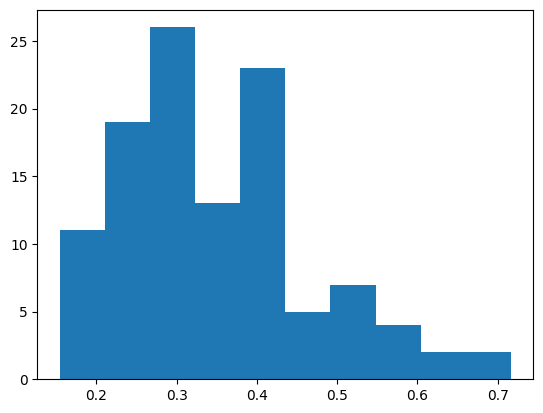

In [ ]:
# ahora hacemos un histograma simple a partir de nuestra variable IDH

plt.hist(IDH_2017['IDH'])

In [ ]:
# ahora hagamos un histograma más PRO
import seaborn as sns # librería para graficar

Text(0.5, 1.0, 'IDH en los distritos de Cusco (2017)')

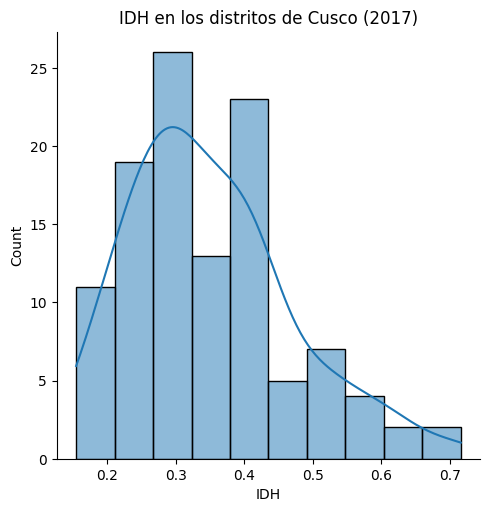

In [ ]:
# Organizamos el histograma con la función displot
sns.displot(data=IDH_2017,
            x='IDH', kde=True) # kde es la curva de densidad

plt.title('IDH en los distritos de Cusco (2017)') # title es de matplot, seaborn no tiene title

### **Variable 2: IDH provincial**


Ahora haremos algo bien chévere. Sin crear otro df, haremos un análisis provincial del IDH, utilizando los promedios.

In [ ]:
# paso 1: probamos obtener los valores medios de IDH por cada PROVINCIA

IDH_2017.groupby('PROVINCIA')['IDH'].mean()

,IDH
PROVINCIA,
Acomayo,0.261470
Anta,0.380685
Calca,0.347849
Canas,0.239136
Canchis,0.395917
Chumbivilcas,0.322188
Cusco,0.545196
Espinar,0.351982
La Convención,0.389759


¡A graficar!
Un gráfico apropiado para estos datos sería uno de barras.

Text(0, 0.5, 'Provincia')

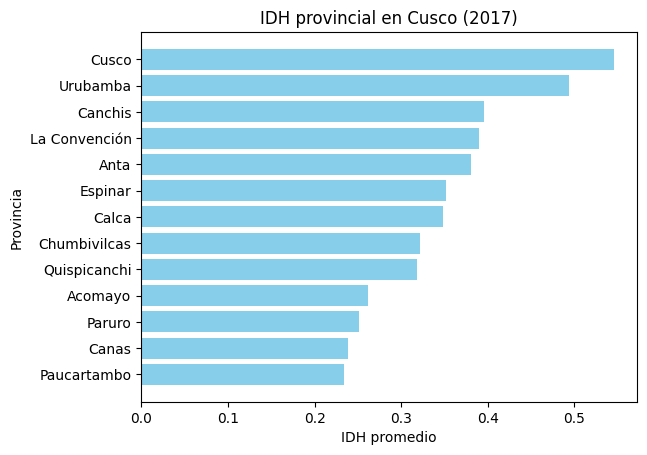

In [ ]:
# Guardamos nuestro cuadro de arriba como un objeto
IDH_2017_PROVINCIA = IDH_2017.groupby('PROVINCIA')['IDH'].mean()

# Paso 2: Ordenamos la tabla por el valor de IDH
IDH_2017_PROVINCIA = IDH_2017_PROVINCIA.sort_values()

# Paso 3: Creamos las barras horizontales
plt.barh(y=IDH_2017_PROVINCIA.index, width=IDH_2017_PROVINCIA.values,
         color = 'skyblue') # Use .index to access the province names

# Detalles: Agregar título y etiquetas
plt.title('IDH provincial en Cusco (2017)')
plt.xlabel('IDH promedio')
plt.ylabel('Provincia')


### **Plus: análisis de la evolución de IDH en el tiempo**

Ahora agrupamos por año nuestros casos para hacer un análisis de tiempo de la variable IDH.

Una **línea de tendencia** es una línea recta de ajuste perfecto que se usa con conjuntos de datos lineales simples. Los datos son lineales si el patrón en sus puntos de datos se parece a una línea. Una línea de tendencia lineal frecuentemente muestra que hay algo que aumenta o disminuye a un ritmo constante.

Esperamos ver una tendencia positiva, ¿será el caso?

In [ ]:
# paso 1: probamos obtener los valores medios de IDH por cada AÑO

IDH_CUSCO.groupby('YEAR')['IDH'].mean()

,IDH
YEAR,
2003,0.231808
2007,0.237963
2010,0.273068
2011,0.285187
2012,0.299506
2015,0.326728
2017,0.350565


Text(0, 0.5, 'Año')

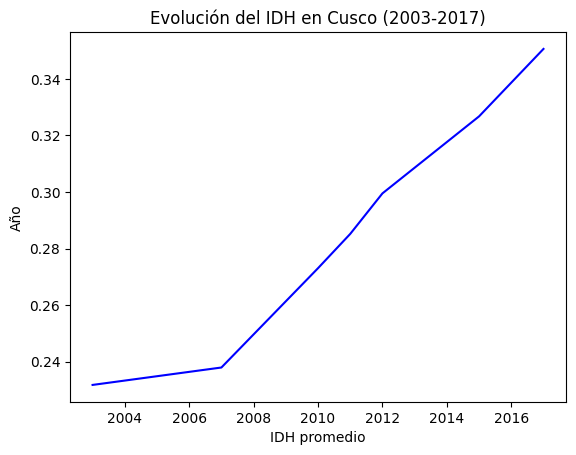

In [ ]:
# Guardamos nuestro cuadro de arriba como un objeto
IDH_TS = IDH_CUSCO.groupby('YEAR')['IDH'].mean() # por Time Series (pueden ponerle cualquier nombre)

# Paso 2: graficamos con MatPLOT

IDH_TS.plot(kind='line', x='YEAR', y='IDH', color='blue')

# Detalles: Agregar título y etiquetas
plt.title('Evolución del IDH en Cusco (2003-2017)')
plt.xlabel('IDH promedio')
plt.ylabel('Año')

### **Varible 3: Ingreso distrital**

Text(0.5, 1.0, 'Ingreso mensual p/c en los distritos de Cusco (2017)')

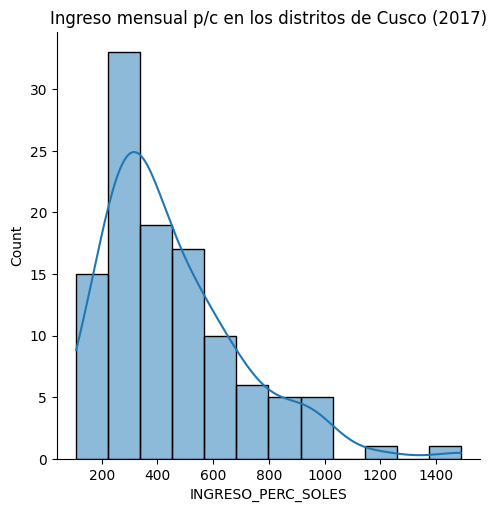

In [ ]:
# Organizamos el histograma con la función displot
sns.displot(data=IDH_2017, x='INGRESO_PERC_SOLES', kde=True) # kde es la curva de densidad
plt.title('Ingreso mensual p/c en los distritos de Cusco (2017)') # title es de matplot, seaborn no tiene title

## 💡 Punto extra 💡

**¿Qué diferencias encontramos en la distribución del ingreso medio y la distribución del IDH?**

3 participantes podrán ganar un punto extra en su evaluación final.

### 2.3. Creación y análisis gráfico de una variable categórica del IDH

Ahora, queremos hacer un análisis con una variable categórica. El problema es que no tenemos una en este df 😞. Pero podemos crearla 😸.

Vamos a crear la variable categórica ordinal nivel_IDH a partir de la variable (numérica) IDH. Emplearemos la siguiente categorización, **pero aplicada a distritos**:

- Muy alto: países con un IDH superior a 0,80.
- Alto: países con un IDH entre 0,70 y 0,80.
- Medio: países con un IDH entre 0,55 y 0,70.
- Bajo: países con un IDH inferior a 0,55.


Para esto hay varios caminos, pero usaremos el siguiente:

In [ ]:
# Definir los límites de las categorías y las etiquetas correspondientes
bins = [0, 0.25, 0.45, 0.65, 1]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Medio alto']

# Crear la variable categórica ordinal 'nivel_IDH'
IDH_2017['nivel_IDH'] = pd.cut(IDH_2017['IDH'], bins=bins, labels=labels, right=False, ordered=True)

<ipython-input-105-07f685219d0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDH_2017['nivel_IDH'] = pd.cut(IDH_2017['IDH'], bins=bins, labels=labels, right=False, ordered=True)


In [ ]:
# Contar el número de distritos en cada categoría de 'nivel_IDH'
conteo_nivel_IDH = IDH_2017.groupby('nivel_IDH')['DISTRITO'].count().reset_index()

# Renombrar la columna de conteo para claridad
conteo_nivel_IDH.columns = ['nivel_IDH', 'Cantidad de Distritos']

<ipython-input-106-b0785ff55009>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_nivel_IDH = IDH_2017.groupby('nivel_IDH')['DISTRITO'].count().reset_index()


In [ ]:
conteo_nivel_IDH

,nivel_IDH,Cantidad de Distritos
0,Muy bajo,24
1,Bajo,70
2,Medio,16
3,Medio alto,2


¡Graficamos!

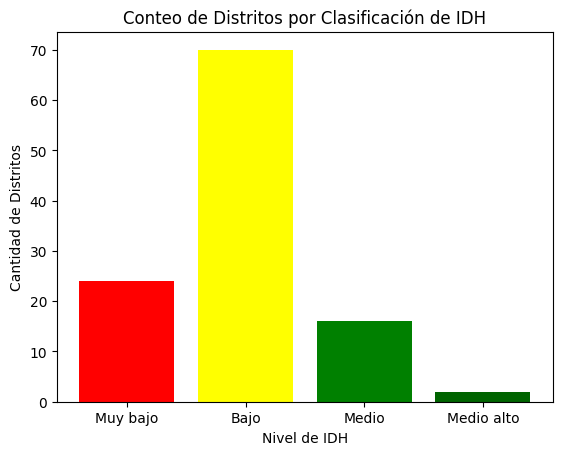

In [ ]:
# Crear el gráfico de barras
fig, ax = plt.subplots()

# Graficar el conteo de distritos por nivel de IDH
ax.bar(conteo_nivel_IDH['nivel_IDH'], conteo_nivel_IDH['Cantidad de Distritos'],
       color=['red', 'yellow', 'green', 'darkgreen'])

# Agregar título y etiquetas
plt.title('Conteo de Distritos por Clasificación de IDH')
plt.xlabel('Nivel de IDH')
plt.ylabel('Cantidad de Distritos')

# Mostrar el gráfico
plt.show()

### ¿Cómo sé la codificación de la base de datos que estoy usando?

Usaremos la función chardet.detect

In [ ]:
!pip install cchardet
import cchardet as chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/653.6 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cchardet: filename=cchardet-2.1.7-cp310-cp310-linux_x86_64.whl size=289384 sha256=7ffe6050aa42043ecc336ae4b74b1f562f1981d1980d0598d41f2d28b8ec2560
  Stored in directory: /root/.cache/pip/wheels/ee/e0/ab/e01326f15c59438d080b1496dbab8091e952ec72f35e3c437e
Successfully built cchardet


In [ ]:
# Detectar la codificación del archivo
def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        return chardet.detect(file.read())['encoding']

# Usar la función
encoding = detect_encoding('Enaho01A-2023-300.csv')
print(encoding)

ISO-8859-10


In [ ]:
enaho_unido.columns

Index(['AŅO_x', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO_x',
       'DOMINIO_x', 'ESTRATO_x', 'CODINFOR_x',
       ...
       'I538E1', 'I5294B', 'I5404B', 'I541A', 'OCU500', 'OCUPINF', 'EMPLPSEC',
       'FAC500A', 'NCONGLOME_y', 'SUB_CONGLOME_y'],
      dtype='object', length=1920)

In [ ]:
# Convertir las columnas a una lista y luego imprimir la lista
column_list = enaho_unido.columns.tolist()
print(column_list)

['AŅO_x', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO_x', 'DOMINIO_x', 'ESTRATO_x', 'CODINFOR_x', 'P300N', 'P300I', 'P300A', 'P301A_x', 'P301B', 'P301C', 'P301D', 'P301A0', 'P301A1', 'P301B0', 'P301B1', 'P301B3', 'P302', 'P302X', 'P302A', 'P302B', 'P303', 'P304A', 'P304B', 'P304C', 'P304D', 'P305', 'P306', 'P307', 'P307A1', 'P307A2', 'P307A3', 'P307A4', 'P307A4_5', 'P307A4_6', 'P307A4_7', 'P307B1', 'P307B2', 'P307B3', 'P307B4', 'P307B4_5', 'P307B4_6', 'P307B4_7', 'P307C', 'P308A', 'P308B', 'P308C', 'P308D', 'P308B1', 'P308B2', 'P308B3', 'P308B4', 'P308B5', 'P308C1', 'P308C2', 'P310', 'P310B1', 'P310C0', 'P310C1', 'P310D1', 'P310D2', 'P310E0', 'P310E1', 'P310E3', 'P311N$1', 'P311N$2', 'P311N$3', 'P311N$4', 'P311N$5', 'P311N$6', 'P311N$7', 'P311N$8', 'P311N$9', 'P311$1', 'P311$2', 'P311$3', 'P311$4', 'P311$5', 'P311$6', 'P311$7', 'P311$8', 'P311$9', 'P311A1$1', 'P311A1$2', 'P311A1$3', 'P311A1$4', 'P311A1$5', 'P311A1$6', 'P311A1$7', 'P311A1$8', 'P311A1$9', 'P311A2$1', 'P31

## Lista de funciones y paquetes vistos hoy

Para conectar drive:

import os
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


Funciones para leer archivos de la librería pandas

import pandas as pd

- csv: pd.read_csv
- xlsx: pd.read_excel
- spss: pd.read_spss (terminación .sav)
- sql: pd.read_sql

Atributos:

.columns: Devuelve las etiquetas de las columnas del DataFrame.

.index: Devuelve las etiquetas de las filas del DataFrame.

.dtypes: Devuelve los tipos de datos de cada columna en el DataFrame.

.shape: Devuelve una tupla que representa la dimensionalidad del DataFrame, es decir, (número de filas, número de columnas).

.size: Devuelve el número total de elementos en el DataFrame.

Próx clase: **Creación de gráficos y visualización de datos**
- Introducción a las librerías Matplotlib y Seaborn para visualización de datos
- Creación de gráficos de barras, histogramas, gráficos de líneas y gráficos de dispersión
- Personalización de gráficos: títulos, etiquetas y leyendas
- Interpretación de gráficos en el contexto de análisis social

In [ ]:
print("Gracias por atender! :)")

Gracias por atender! :)
